In [1]:
import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.dates import YearLocator, WeekdayLocator, MonthLocator, DayLocator, HourLocator, DateFormatter
import matplotlib.ticker as ticker
import matplotlib.dates as mdates

import datetime

In [2]:
fid = '/Users/bell/in_and_outbox/2018/stabeno/nov/m8_winds/NARR_M8_UVAT_1980-2014.xlsx'

fin = pd.read_excel(fid,sheet_name=0,parse_dates=['time'],index_col='time')

In [3]:
# calculate wind direction and magnitude
#  Wind Direction is defined as 0 in +U direction, 90 in +V, -180/180 in -U and -90 in -V with increasing ccw
fin['magnitude'] = np.sqrt(fin['WU_422']**2 + fin['WV_423']**2)
fin['direction'] = np.rad2deg(np.arctan2(fin['WV_423'],fin['WU_422']))

In [76]:
fin['month'] = fin.index.month_name()

In [77]:
# find values where magnitude is < 2 and make missing (these are calm/variable and will mess up temp averages)
fin.groupby([fin.month,pd.cut(fin.magnitude, [0,2])]).agg(['mean','min','max','count']).to_csv('temp_calm.csv')
fin.groupby([fin.month,pd.cut(fin.magnitude, [0,2])]).agg(['std']).to_csv('temp_calm_std.csv')

#fin.groupby([pd.Grouper(freq='M'),pd.cut(fin.magnitude, [0,2])]).agg(['mean','min','max','count']).to_csv('temp_calm.csv')
#fin.groupby([pd.Grouper(freq='M'),pd.cut(fin.magnitude, [0,2])]).agg(['std']).to_csv('temp_calm_std.csv')

In [78]:
fin[fin['magnitude'] <2] = np.nan

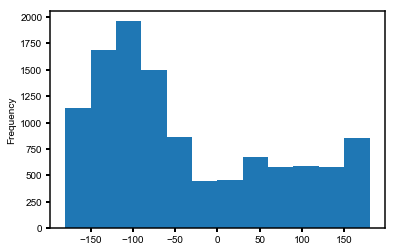

In [79]:
%matplotlib inline
fin.direction.plot.hist(bins=12)

In [80]:
#bins are closed right, open left
bins = [-180,-150,-120,-90,-60,-30,0,30,60,90,120,150,180]
fin.groupby([fin.month,pd.cut(fin.direction, bins)]).agg(['mean','min','max','count']).to_csv('temp.csv')
fin.groupby([fin.month,pd.cut(fin.direction, bins)]).agg(['std']).to_csv('temp_std.csv')

#fin.groupby([pd.Grouper(freq='M'),pd.cut(fin.direction, bins)]).agg(['mean','min','max','count']).to_csv('temp.csv')
#fin.groupby([pd.Grouper(freq='M'),pd.cut(fin.direction, bins)]).agg(['std']).to_csv('temp_std.csv')

In [81]:
fin_mean = fin.groupby('index').mean()
fin_mean.to_csv('1980-2014_AT.csv')

fin_std = fin.groupby('index').std()
fin_std.to_csv('1980-2014_AT_std.csv')

fin_sem = fin.groupby('index').sem()
fin_sem.to_csv('1980-2014_AT_sem.csv')


In [82]:
### specify primary bulk figure parameters
fontsize = 20
labelsize = 16
#plotstyle = 'seaborn'
max_xticks = 10
plt.style.use('seaborn-ticks')
mpl.rcParams['svg.fonttype'] = 'none'
mpl.rcParams['ps.fonttype'] = 42 #truetype/type2 fonts instead of type3
mpl.rcParams['pdf.fonttype'] = 42 #truetype/type2 fonts instead of type3
mpl.rcParams['axes.grid'] = False
mpl.rcParams['axes.edgecolor'] = 'black'
mpl.rcParams['axes.linewidth'] = 1.5
mpl.rcParams['axes.labelcolor'] = 'black'
mpl.rcParams['grid.linestyle'] = '--'
mpl.rcParams['grid.linestyle'] = '--'
mpl.rcParams['xtick.major.size'] = 4
mpl.rcParams['xtick.minor.size'] = 2
mpl.rcParams['xtick.major.width'] = 2
mpl.rcParams['xtick.minor.width'] = 1
mpl.rcParams['ytick.major.size'] = 4
mpl.rcParams['ytick.minor.size'] = 1
mpl.rcParams['ytick.major.width'] = 2
mpl.rcParams['ytick.minor.width'] = 1
mpl.rcParams['ytick.direction'] = 'out'
mpl.rcParams['xtick.direction'] = 'out'
mpl.rcParams['ytick.color'] = 'black'
mpl.rcParams['xtick.color'] = 'black'

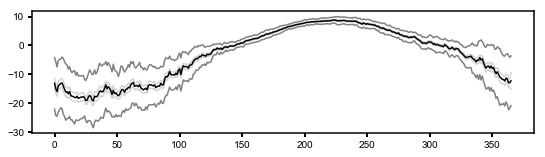

In [83]:
fig = plt.figure(1,figsize=(9,2.25))
ax1 = plt.subplot2grid((1, 1), (0, 0), colspan=1, rowspan=1)

plt.plot(fin_std.index,fin_mean.AT_21+fin_std.AT_21,'grey')
plt.plot(fin_std.index,fin_mean.AT_21-fin_std.AT_21,'grey')
plt.plot(fin_mean.index,fin_mean.AT_21-fin_sem.AT_21,'lightgrey')
plt.plot(fin_mean.index,fin_mean.AT_21+fin_sem.AT_21,'lightgrey')
plt.plot(fin_mean.index,fin_mean.AT_21,'black')


fig.savefig('images/M8_NARR_ATmean_1980-2014.png',dpi=300)



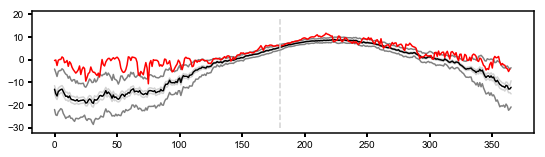

In [116]:
fin2 = pd.read_excel(fid,sheet_name=1,parse_dates=['time'],index_col='time')

fig = plt.figure(1,figsize=(9,2.25))
ax1 = plt.subplot2grid((1, 1), (0, 0), colspan=1, rowspan=1)

plt.plot(fin_std.index,fin_mean.AT_21+fin_std.AT_21,'grey')
plt.plot(fin_std.index,fin_mean.AT_21-fin_std.AT_21,'grey')
plt.plot(fin_mean.index,fin_mean.AT_21-fin_sem.AT_21,'lightgrey')
plt.plot(fin_mean.index,fin_mean.AT_21+fin_sem.AT_21,'lightgrey')
plt.plot(fin_mean.index,fin_mean.AT_21,'black')
plt.plot(fin2['2017-07':'2017-12']['index'],fin2['2017-07':'2017-12'].AT_21,'red')
plt.plot(fin2['2018-01':'2018-06']['index'],fin2['2018-01':'2018-06'].AT_21,'red')
plt.plot(np.arange(-30,20)*0+180,range(-30,20),'--',color='lightgrey',markersize=.25)




In [111]:
np.arange(-30,20)

array([-30, -29, -28, -27, -26, -25, -24, -23, -22, -21, -20, -19, -18,
       -17, -16, -15, -14, -13, -12, -11, -10,  -9,  -8,  -7,  -6,  -5,
        -4,  -3,  -2,  -1,   0,   1,   2,   3,   4,   5,   6,   7,   8,
         9,  10,  11,  12,  13,  14,  15,  16,  17,  18,  19])